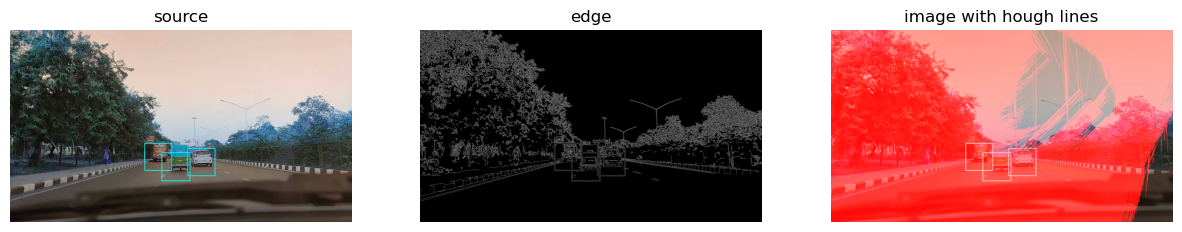

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cannytest
def draw_lines(img, houghLines, color=[255, 0, 0], thickness=2):
    for line in houghLines:
        for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))

            cv2.line(img,(x1,y1),(x2,y2),color,thickness)   

def weighted_img(img, initial_img, alpha=0.8, beta=1., λ=0.):
    return cv2.addWeighted(initial_img, alpha, img, beta, λ) 

## 读取图片
img  = cv2.imread("test.jpg")

## 图片灰度化
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

## 高斯模糊
img_blur = cv2.GaussianBlur(img_gray,(5,5),0)

## 边缘检测
img_edges = cv2.Canny(img_blur,50,120)

## 霍夫变换
rho = 1
theta = np.pi/180
threshold = 100
hough_lines = cv2.HoughLines(img_edges,rho , theta , threshold) 

## 结果展示
img_lines =  np.zeros_like(img)
draw_lines(img_lines,hough_lines)
img_lines = weighted_img(img_lines,img)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(img,cmap="gray")
plt.title("source",fontsize=12)
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(img_edges,cmap="gray")
plt.title("edge",fontsize=12)
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(img_lines)
plt.title("image with hough lines",fontsize=12)
plt.axis("off")
plt.show()